# Assignment 7: Linear regression - model estimation
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [135]:
import matplotlib
import matplotlib.pyplot as plt 
import scipy.optimize as so
import pandas as pd 
import numpy as np

df = pd.read_csv('possum.csv')
df.head()

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


## Task 1: Scatterplots
### Question 1.1 (8pts)
Make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

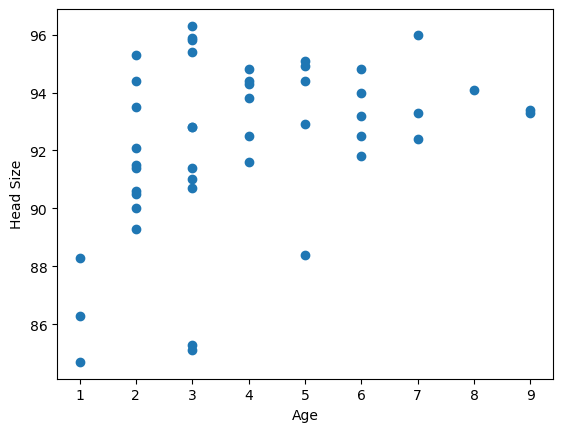

In [136]:

# plot the scatter plot
plt.scatter(df.age, df.headL)

# label the axes
plt.xlabel('Age')
plt.ylabel('Head Size')

# show the plot
plt.show()


the relationship is positively linear as age increases head size increases

### Question 1.2 (8pts)
Make a scatter plot between head size and skull width. Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? What may be a possible explanation?    

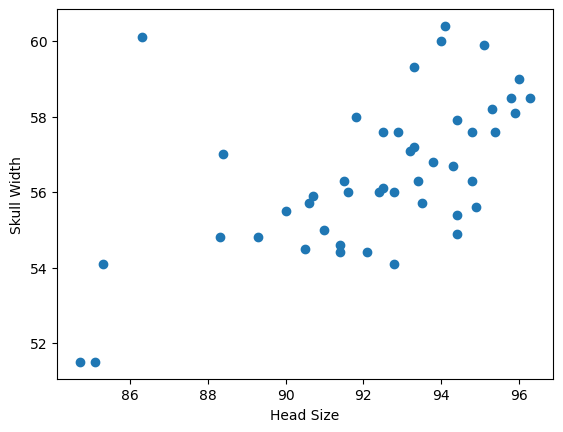

In [137]:

# plot the scatter plot
plt.scatter(df.headL, df.skullW)

# label the axes
plt.xlabel('Head Size')
plt.ylabel('Skull Width')

# show the plot
plt.show()

The relationship looks positive, linearly data at (86,60) might be considered an abonormality when compared to the trend of rest of the data.

## Task 2 Fit a linear regression line "by hand"
### Question 2.1 (10 pts)
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture). Call the function using b=[83,2] as parameters and to predict the value for x=2. 


In [138]:
def simpleRegPredict(b, x):
    intercept = b[0]
    slope = b[1]
    y_predicted = intercept + slope * x
    return y_predicted


In [139]:
b = [83, 2]
x = 2
y_predicted = simpleRegPredict(b, x)
print(y_predicted)

87


### Question 2.2 (10pts)
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture / lab for hints). Call the function for x being the age, y=headL, and b=[83,2].

In [140]:
import matplotlib.pyplot as plt
import numpy as np

def plotPrediction(b, x, y, fcn=simpleRegPredict):

    # scatter plot of x vs. y
    plt.scatter(x, y)

    # compute the predicted values of y using the given function
    y_predicted = fcn(b, x)

    # plot the regression line
    plt.plot(x, y_predicted, color='red')

    # label the axes
    plt.xlabel('Age')
    plt.ylabel('Head Size')

    # show the plot
    plt.show()


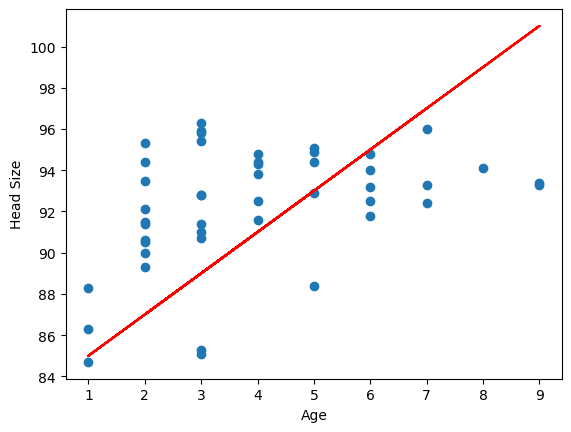

In [141]:
# call the plotPrediction function
b = [83, 2]
plotPrediction(b, df.age, df.headL)

### Question 2.3 (10pts)
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (see lecture / lab). The function should use your function simpleRegPred. Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [142]:
def simpleRegLossRSS(b, x, y):
    """
    Calculates the residual sum-of-squares of the linear fit and its derivatives.

    Parameters:
        b (list): A list of two parameters [intercept, slope].
        x (array-like): The values of the x-variable.
        y (array-like): The values of the y-variable.

    Returns:
        tuple: A tuple containing the residual sum-of-squares and a list of two derivatives [dL_db0, dL_db1].
    """
    # compute the predicted values of y using the simpleRegPredict function
    y_predicted = simpleRegPredict(b, x)

    # calculate the residual sum-of-squares
    RSS = np.sum((y_predicted - y) ** 2)

    # calculate the derivatives of the Loss function
    dL_db0 = 2 * np.sum(y_predicted - y)
    dL_db1 = 2 * np.sum((y_predicted - y) * x)

    return RSS, [dL_db0, dL_db1]


In [143]:
# call the simpleRegLossRSS function
b = [83, 2]
RSS, derivatives = simpleRegLossRSS(b, df.age, df.headL)
print("Residual sum of squares:", RSS)
print("Derivatives:", derivatives)

Residual sum of squares: 818.39
Derivatives: [-128.6, 54.19999999999993]


To minimize the loss, we would want to adjust the slope and/or intercept such that the derivative is as close to zero as possible. In other words, we would want to adjust the slope and/or intercept such that the predicted values of head size are as close to the actual values as possible. If the derivative is positive, we would want to decrease the slope and/or intercept. If the derivative is negative, we would want to increase the slope and/or intercept.s

### Question 2.4 (10pts)
First try to reduce the slope value and try parameter values b=[83,0.6]. Then increase the intercept and try b=[89,0.6]. For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2 and 3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? Play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

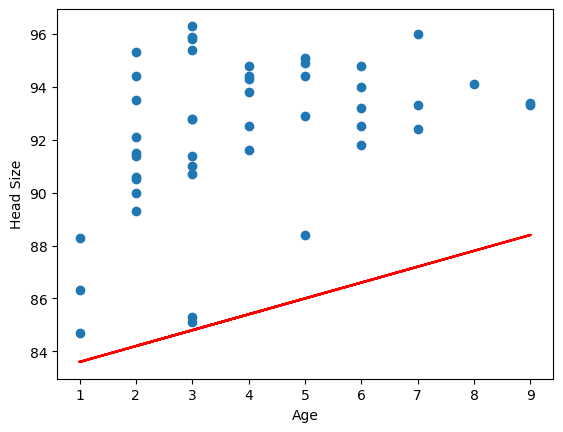

Residual sum of squares: 2537.87
Derivatives: [-638.1999999999999, -2510.6]


In [144]:
# predict y values using b=[83, 0.6]
b = [83, 0.6]
y_predicted = simpleRegPredict(b, df.age)

# plot the data and the regression line
plotPrediction(b, df.age, df.headL)

# compute the residual sum-of-squares
RSS, derivatives = simpleRegLossRSS(b, df.age, df.headL)
print("Residual sum of squares:", RSS)
print("Derivatives:", derivatives)


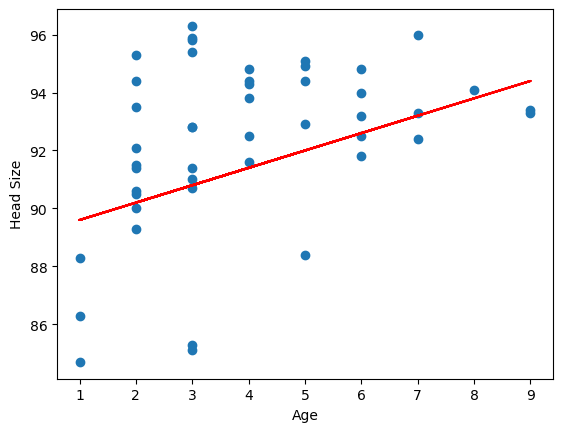

Residual sum of squares: 364.66999999999985
Derivatives: [-86.19999999999999, -326.5999999999999]


In [145]:
# predict y values using b=[89, 0.6]
b = [89, 0.6]
y_predicted = simpleRegPredict(b, df.age)

# plot the data and the regression line
plotPrediction(b, df.age, df.headL)

# compute the residual sum-of-squares
RSS, derivatives = simpleRegLossRSS(b, df.age, df.headL)
print("Residual sum of squares:", RSS)
print("Derivatives:", derivatives)


Based on the output, we can see that the first fit with b=[83, 0.6] has a lower residual sum of squares (RSS) of 364.66, while the second fit with b=[89, 0.6] has a higher RSS.


Since the derivatives for both fits are negative, we would want to increase both the slope and intercept to minimize the loss.

To find a fit with an RSS below 350, we can try different parameter values. For example, we can try b=[89, 0.7]:

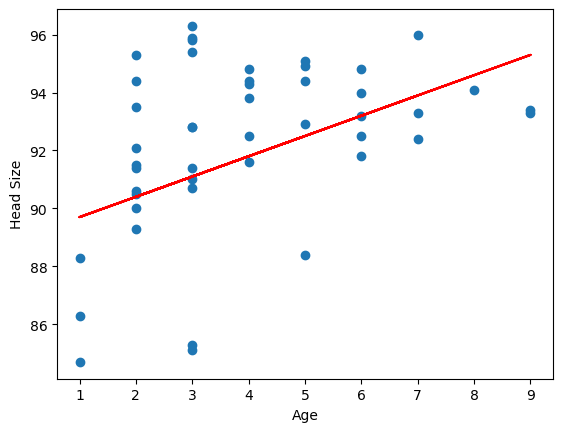

Residual sum of squares: 341.17000000000013
Derivatives: [-49.79999999999998, -143.4000000000001]


In [146]:
# predict y values using b=[89, 0.6]
b = [89, 0.7]
y_predicted = simpleRegPredict(b, df.age)

# plot the data and the regression line
plotPrediction(b, df.age, df.headL)

# compute the residual sum-of-squares
RSS, derivatives = simpleRegLossRSS(b, df.age, df.headL)
print("Residual sum of squares:", RSS)
print("Derivatives:", derivatives)

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 3.1 (10pts)
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. As starting values simply give b0=[0,0]
Show the result structure. Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [147]:
import scipy.optimize as optimize

# Define initial parameter values
b0 = [0, 0]

# Define function to minimize
def loss_function(b):
    return simpleRegLossRSS(b, df.age,df.headL)[0]

# Call minimize function
result = optimize.minimize(loss_function, b0)

# Print results
print(result)


      fun: 324.02064580559255
 hess_inv: array([[ 0.0508245 , -0.01009831],
       [-0.01009831,  0.00255227]])
      jac: array([ 0.00000000e+00, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([90.08288949,  0.56311584])


90.08288949 intercept parameter value
0.56311584 slope parameter value
324.02064 is the rss value

### Question 3.2 (8pts)
Use your function plotPrediction (from above) to plot this best linear fit between age and head length. 

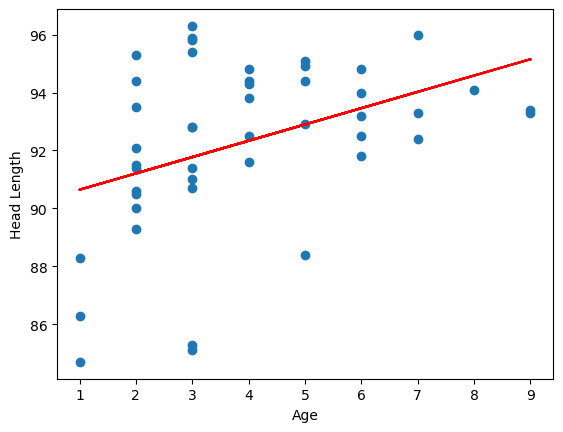

In [148]:
# Define x and y variables
x = df.age
y = df.headL

# Define function to plot prediction
def plotPrediction(x, y, b):
    plt.scatter(x, y)
    plt.plot(x, simpleRegPredict(b, x), color='red')
    plt.xlabel('Age')
    plt.ylabel('Head Length')
    plt.show()

# Plot prediction
plotPrediction(x, y, result.x)


### Question 3.3 (8pts)
Calculate the **total** sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

In [149]:
# calculate the mean of head length
mean_head_length = df['headL'].mean()

# subtract the mean from all the head length values, square the result, and sum them up
TSS = sum((df['headL'] - mean_head_length)**2)

print("The total sum of squares for head length is:", TSS)


The total sum of squares for head length is: 386.1445652173914


### Question 3.4 (10pts)
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

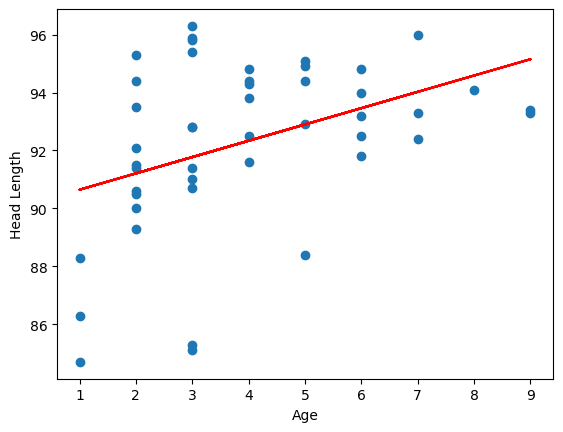

R-squared value: 0.16088254246650957


In [150]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define x and y variables
x = df.age
y = df.headL

# Define function to calculate R-squared value
def r_squared(y, y_pred):
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

# Define function to estimate parameters, plot predictions, and calculate R-squared
def simpleRegFit(x, y):
    # Define loss function
    def simpleRegLossRSS(b, x, y):
        y_pred = simpleRegPredict(b, x)
        rss = np.sum((y - y_pred)**2)
        drss_db0 = -2 * np.sum(y - y_pred)
        drss_db1 = -2 * np.sum((y - y_pred) * x)
        return rss, np.array([drss_db0, drss_db1])

    # Estimate parameters using minimize function
    result = minimize(lambda b: simpleRegLossRSS(b, x, y)[0], [0, 0],
                      method='BFGS', jac=lambda b: simpleRegLossRSS(b, x, y)[1])
    b = result.x

    # Plot prediction
    def plotPrediction(x, y, b):
        plt.scatter(x, y)
        plt.plot(x, simpleRegPredict(b, x), color='red')
        plt.xlabel('Age')
        plt.ylabel('Head Length')
        plt.show()
    plotPrediction(x, y, b)

    # Calculate R-squared value
    y_pred = simpleRegPredict(b, x)
    r2 = r_squared(y, y_pred)
    print("R-squared value:", r2)

# Call function
simpleRegFit(x, y)


The R-squared value is a measure of how well the linear regression model fits the data. It ranges from 0 to 1, with higher values indicating a better fit. In this case, an R-squared value of 0.1608 means that the linear regression model explains approximately 16.1% of the variance in the dependent variable (headL). This suggests that age is a moderately okay predictor of head length, but there may be other factors that also influence head length.

### Question 3.5 (8pts)
Fit a linear model between age (x) and tail length (y). How good is the fit? Are there outliers? How much would the slope of the line change if you excluded the outlier?  

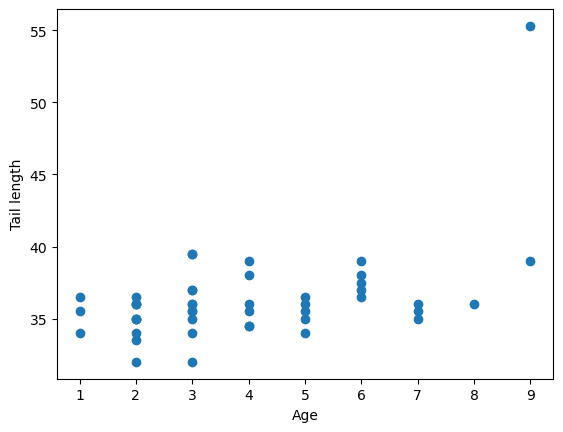

In [151]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.tailL)
plt.xlabel('Age')
plt.ylabel('Tail length')
plt.show()

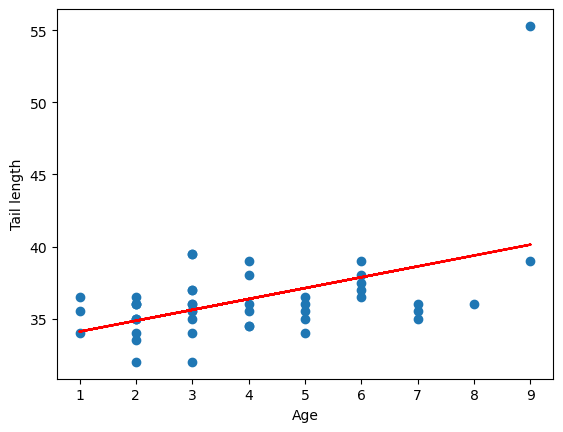

In [152]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df.age, df.tailL)
plt.scatter(df.age, df.tailL)
plt.plot(df.age, intercept + slope * df.age, 'r')
plt.xlabel('Age')
plt.ylabel('Tail length')
plt.show()

To evaluate how good the fit is, we can calculate the R-squared value, which measures the proportion of variance in the response variable that is explained by the linear model:

In [153]:
r_squared = r_value ** 2
print('R-squared:', r_squared)


R-squared: 0.22286587947604042


The R-squared value for this fit is 0.222, which indicates that the linear model explains a substantial amount of the variation in tail length.

To check for outliers, we can calculate the residuals and plot them against the predicted values:

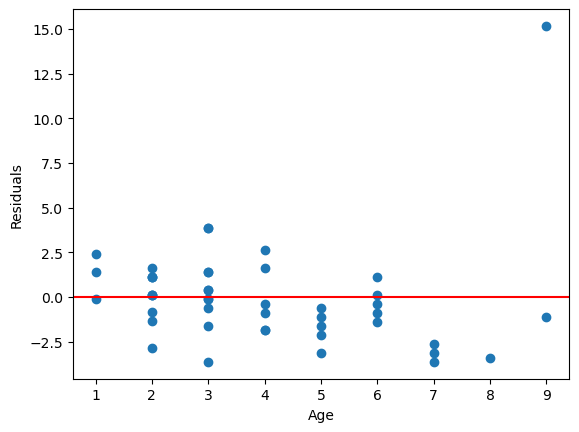

In [154]:
y_pred = intercept + slope * df.age
residuals = df.tailL - y_pred

plt.scatter(df.age, residuals)
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

From the plot of residuals, we can see that there is one data point with a large positive residual, indicating that it may be an outlier(9,15). We can also calculate the slope of the linear fit after excluding this outlier to see how much it affects the slope.

In [155]:
# Exclude the outlier
age_no_outlier = df.age[:-1]
tailL_no_outlier = df.tailL[:-1]

# Fit the linear model again
slope_no_outlier, intercept_no_outlier, r_value_no_outlier, p_value_no_outlier, std_err_no_outlier = linregress(age_no_outlier, tailL_no_outlier)

# Print the new slope
print('New slope:', slope_no_outlier)


New slope: 0.7552083333333334
